# MNIST without CNN

### **Autor**: 
Miguel Bravo Prieto

--- 

The acronym for the name of the MNIST data set comes from "Modified National Institute of Standards and Technology" and represents one of the prototypical problems of computer vision since its origin in 1999. It contains images of handwritten numbers that serve as lines basis for improving visual recognition algorithms. It consists of images with a dimension of 28x28 pixels out of a total of 784x70,000 pixels between the training and test sets, each pixel containing a value between 0 and 255 as a measure of its intensity, where 0 is the darkest value and 255 is the lighter value.

Throughout this Jupyter Notebook it is intended to solve the classification problem posed by MNIST using classification models with a classical machine learning approach while some improvements are proposed for these visual recognition algorithms.

Specifically, we will focus on the SVM and K-Nearest Neighbors models to face the exercise.

---

### **Index**

1. [Library and data load](#id1)
2. [Preparation and display](#id2)
3. [Model optimization](#id3)
4. [Model selection](#id4)
5. [Model Evaluation](#id5)
6. [Visual Recognition Improvements](#id6)

--- 

### **Disclosure**

This notebook is presented as an example for educational purposes on the application of classical models to problems normally seen from the point of view of Deep Learning. It also aims to demonstrate the sensitivity of the models with respect to the data used as input and the difficulty associated to solving the problems of Computer Vision. Also, some comments may be in spanish but they only refer to the code.

## Library and data load<a name="id1"></a>

First of all, we import all the libraries that we are going to work with and load the files that contain the training and test data sets. Later we will visualize the size of these in order to check the structure of the data.

In [1]:
## Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_svmlight_file
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
## Leemos los archivos
data_train = "./mnist_train"
data_test = "./mnist_test.t"

X_train ,y_train = load_svmlight_file(data_train, n_features=784)
X_test ,y_test = load_svmlight_file(data_test, n_features=784)

In [3]:
## Observamos las dimensiones de cada set de datos
print("Tamaño del set de entrenamiento:", X_train.shape)
print("Tamaño del target de entrenamiento:", y_train.shape)

print("\nTamaño del set de testeo:", X_test.shape)
print("Tamaño del target de testeo:", y_test.shape)

Tamaño del set de entrenamiento: (60000, 784)
Tamaño del target de entrenamiento: (60000,)

Tamaño del set de testeo: (10000, 784)
Tamaño del target de testeo: (10000,)


---

## Preparation and display <a name="id2"></a>

To better understand what type of data we are working with, we will visualize some samples of the data set. Previously we will transform the data to a format with which we can work comfortably and we will apply a normalization dividing by the maximum value of the pixel so that we will be able to apply the machine learning models correctly without altering the value 0 that represents the background of the image, allowing us to generate the visual contrast with the outline of the number.

In [4]:
## Pasamos los datos a un formato "dense vector"
X_train = X_train.todense()
X_test = X_test.todense()

## Normalizamos los datos
X_train = X_train/255
X_test = X_test/255

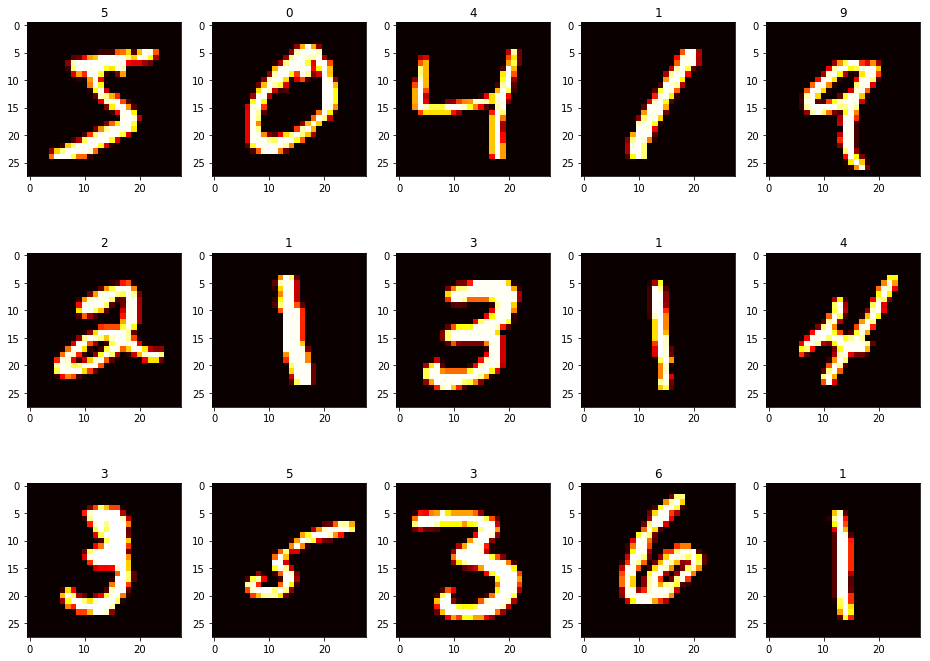

In [5]:
## Generamos multiples visualizaciones
plt.figure(figsize=(16, 12))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.title(int(y_train[i]))
    plt.imshow(X_train[i,:].reshape([28,28]), cmap=plt.cm.hot);

---

## Model optimization <a name="id3"></a>

Before choosing the final model, a grid is generated to adjust the hyperparameters of the two models that have been proposed to face the exercise, so that we can generate an optimized model where the real power of each model will be shown. In order to carry out this task within a reasonably acceptable time, a series of random numbers have been generated to extract a small sample from the training and testing set. Subsequently, both models have been trained with their respective grids. Below are two links to the documentation of both models in case it is of interest to the reader.

[Doc SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

[Doc KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [6]:
## Obtenemos una muestras aleatorias con dimensiones equivalentes al 10% del tamaño del set 
index_train = np.random.randint(60000, size=6000)
index_test = np.random.randint(10000, size=1000)

X_train_opt = X_train[index_train, :]
X_test_opt = X_test[index_test, :]

y_train_opt = y_train[index_train, ]
y_test_opt = y_test[index_test, ]

In [7]:
%%time

tuned_C = np.array([0.1, 1, 10])
tuned_kernel = np.array(["linear", "poly", "rbf", "sigmoid"])
tuned_decision_function_shape = np.array(["ovr", "ovo"])

tuned_parameters = [{"C":tuned_C,
                     "kernel":tuned_kernel,
                     "decision_function_shape":tuned_decision_function_shape}]

## Modelo Support Vector Classifier optimizado
svc_grid = GridSearchCV(SVC(gamma="auto"), tuned_parameters, cv=10, iid=True).fit(X_train_opt, y_train_opt)

svc_best = svc_grid.best_estimator_
svc_grid_acc = svc_grid.score(X_test_opt, y_test_opt)  

print("El modelo con los mejores hiperparametros es:\n" + str(svc_best))
print("\nEl accuracy del test con el modelo Support Vector Classifier optimizado es %2.2f%%\n" %(100*svc_grid_acc)) 

El modelo con los mejores hiperparametros es:
SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

El accuracy del test con el modelo Support Vector Classifier optimizado es 94.30%

Wall time: 3h 40min 34s


In [8]:
%%time

tuned_n_neighbors = np.array([3, 5, 7])
tuned_weights = np.array(["uniform", "distance"])
tuned_algorithm = np.array(["ball_tree", "kd_tree", "brute", "auto"])

tuned_parameters = [{"n_neighbors":tuned_n_neighbors,
                     "weights":tuned_weights,
                     "algorithm":tuned_algorithm}]

## Modelo K-Nearest Neighbors optimizado
KNN_grid = GridSearchCV(KNeighborsClassifier(n_jobs=5), tuned_parameters, cv=10, iid=True).fit(X_train_opt, y_train_opt)

KNN_best = KNN_grid.best_estimator_
KNN_grid_acc = KNN_grid.score(X_test_opt, y_test_opt)  

print("El modelo con los mejores hiperparametros es:\n" + str(KNN_best))
print("\nEl accuracy del test con el modelo K-Nearest Neighbors optimizado es %2.2f%%\n" %(100*KNN_grid_acc))  

El modelo con los mejores hiperparametros es:
KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=5, n_neighbors=5, p=2,
           weights='distance')

El accuracy del test con el modelo K-Nearest Neighbors optimizado es 94.30%

Wall time: 50min 18s


It can be seen how both models show a high accuracy, however, the KNN model shows a significantly lower computation time, which is why it promises to be a good candidate for further study. However, the SVM model also offers quite competitive precision, and in a cluster environment it could be executed in parallel allowing a improvement on time execution performance. It will be necessary to train each model with the total data set to evaluate its real potential.

---

## Model selection <a name="id4"></a>

Finally, we re-generate both models using the entire data set, choosing those parameters that achieve a better performance of the model. It would be interesting to be able to generate a much more exhaustive grid, but due to infrastructure limitations, it cannot be carried out.

In [9]:
%%time

## Modelo Support Vector Classifier
svc = SVC(C=10,
          kernel="rbf",
          degree=3,
          gamma="auto",
          coef0=0.0,
          shrinking=True,
          probability=False,
          tol=0.001,
          cache_size=200,
          class_weight=None,
          verbose=False,
          max_iter=-1,
          decision_function_shape="ovr",
          random_state=None).fit(X_train, y_train)

svc_acc = svc.score(X_test, y_test)

print("El accuracy del test con el modelo Support Vector Classifier es %2.2f%%\n" %(100*svc_acc))

El accuracy del test con el modelo Support Vector Classifier es 96.14%

Wall time: 10min 7s


In [10]:
%%time

## Modelo K-Nearest Neighbors
KNN = KNeighborsClassifier(n_neighbors=5,
                           weights="distance",
                           algorithm="ball_tree",
                           leaf_size=30,
                           p=2,
                           metric="minkowski",
                           metric_params=None,
                           n_jobs=5).fit(X_train, y_train)

KNN_acc = KNN.score(X_test, y_test)

print("El accuracy del test con el modelo K-Nearest Neighbors es %2.2f%%\n" %(100*KNN_acc))

El accuracy del test con el modelo K-Nearest Neighbors es 96.91%

Wall time: 4min 42s


As we could previously observe, the KNN model turns out to be the best candidate for visual image recognition. It has shown greater accuracy in the final modeling and its processing time is still much shorter, facilitating the execution of the study.

---

## Model Evaluation<a name="id5"></a>

To reaffirm our choice, we proceed to carry out an analysis of the two models in greater depth. To do this, we will apply several evaluation methods, which are described below, in addition to visualizing a confusion matrix where we will obtain a great insight into the model's ability to classify each specific number.

In [11]:
## Obtenemos las estimaciones de cada modelo con el set de testeo
svc_y_pred = svc.predict(X_test)
KNN_y_pred = KNN.predict(X_test)

In [12]:
## Generamos una lista con las diferentes clases
labels = ["0","1","2","3","4","5","6","7","8","9"]

## Evaluamos los modelos con diversos metodos (Precision, Recall, F1) 
Evaluation_SVC = classification_report(y_true =y_test, y_pred=svc_y_pred, target_names=labels)
Evalutation_KNN = classification_report(y_true=y_test, y_pred=KNN_y_pred, target_names=labels)

print("Evaluación del modelo Support Vector Classifier:\n", Evaluation_SVC)
print("\nEvaluación del modelo K-Nearest Kneigborhs:\n", Evalutation_KNN)

Evaluación del modelo Support Vector Classifier:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.95      0.95      0.95      1032
           3       0.94      0.96      0.95      1010
           4       0.95      0.97      0.96       982
           5       0.96      0.94      0.95       892
           6       0.97      0.97      0.97       958
           7       0.97      0.95      0.96      1028
           8       0.95      0.95      0.95       974
           9       0.96      0.94      0.95      1009

   micro avg       0.96      0.96      0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000


Evaluación del modelo K-Nearest Kneigborhs:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00   

In [13]:
## Cargamos la función para visualizar la matriz de confusión
def plot_confusion_matrix(cm, title="Matriz de Confusión", cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(cm.shape[0])
    plt.xticks(tick_marks, np.arange(cm.shape[0]))
    plt.yticks(tick_marks, np.arange(cm.shape[0]))
    plt.tight_layout()
    plt.ylabel("Clase Real")
    plt.xlabel("Clase Estimada")

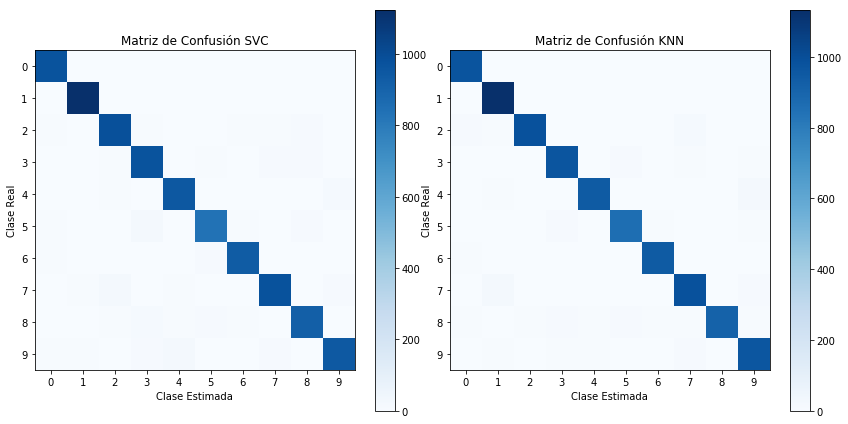

In [14]:
## Calculamos la matriz de confusión
svc_CM = confusion_matrix(y_test, svc_y_pred)
KNN_CM = confusion_matrix(y_test, KNN_y_pred)

## Visualizamos la matriz de confusión de cada modelo
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(121)
plot_confusion_matrix(svc_CM)
ax1.title.set_text("Matriz de Confusión SVC")

ax2 = fig.add_subplot(122)
plot_confusion_matrix(KNN_CM)
ax2.title.set_text("Matriz de Confusión KNN")

plt.show()

We can see how both models are very robust in terms of the correct classification of the different classes that we can find in the data set. However, due to the slight superiority in the accuracy of the KNN model, in addition to its processing speed, we will maintain our decision to use it in the final study.

---

## Visual Recognition Improvements <a name="id6"></a>

Up to this point we have managed to create a model that can recognize handwritten numbers with values between 0 and 9. However, these numbers maintain a certain structure with respect to their orientation, that is, these images are still a configuration of pixels with a certain value, therefore if suddenly a number appears upside down, our model should not be able to recognize that outline of the number, since the distribution of values of each pixel would be very different from what the model knows. Based on this idea, we are going to generate a data set from the one we have by rotating the values of each pixel 180 degrees. Later, we will evaluate our model on this data set to verify that the proposed hypothesis is correct, and if so, we will proceed to generate a new model with the entire data set to, this time, evaluate its visual discrimination capacity on the original dataset and the new dataset we have created.

In [15]:
## Rotamos los pixeles del set de datos 90 grados dos veces para poner boca abajo la imagen
X_train_rotated = np.rot90(X_train,2)
X_test_rotated = np.rot90(X_test,2)

## Para conservar el target invertimos la matriz reescribiendo el orden de los datos
y_train_rotated = y_train[::-1]
y_test_rotated = y_test[::-1]

## Observamos las dimensiones de cada nuevo set de datos.
print("Tamaño del set de entrenamiento rotado:", X_train_rotated.shape)
print("Tamaño del target de entrenamiento rotado:", y_train_rotated.shape)

print("\nTamaño del set de testeo rotado:", X_test_rotated.shape)
print("Tamaño del target de testeo rotado:", y_test_rotated.shape)

Tamaño del set de entrenamiento rotado: (60000, 784)
Tamaño del target de entrenamiento rotado: (60000,)

Tamaño del set de testeo rotado: (10000, 784)
Tamaño del target de testeo rotado: (10000,)


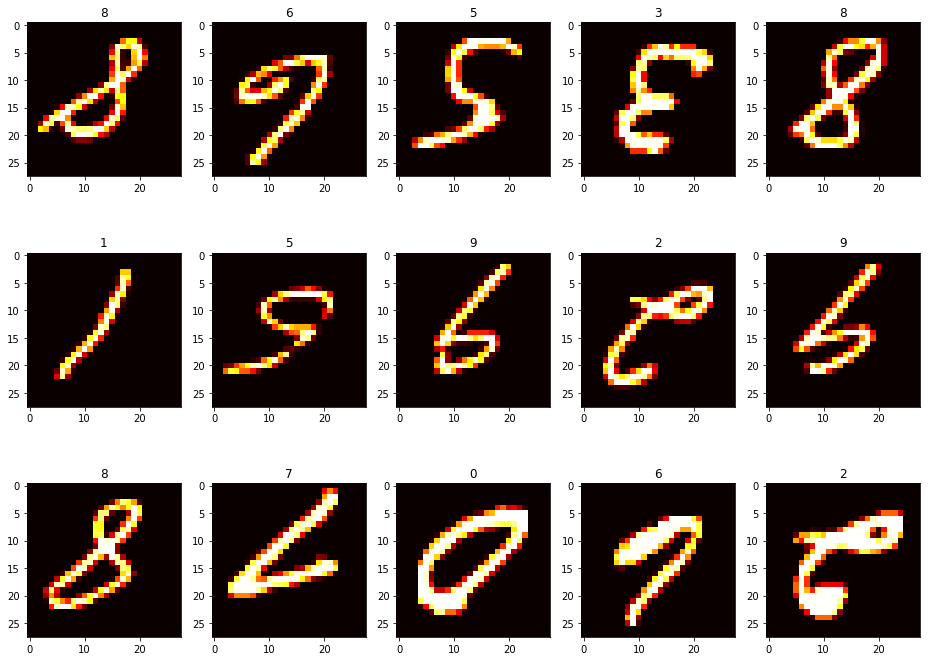

In [16]:
## Generamos multiples visualizaciones del nuevo set de datos rotado
plt.figure(figsize=(16, 12))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.title(int(y_train_rotated[i]))
    plt.imshow(X_train_rotated[i,:].reshape([28,28]), cmap=plt.cm.hot);

In [17]:
## Unimos los set entrenamiento y testeo originales con las imagenes rotadas
new_X_train = np.concatenate((X_train, X_train_rotated), axis=0)
new_y_train = np.concatenate((y_train, y_train_rotated), axis=0)

new_X_test = np.concatenate((X_test, X_test_rotated), axis=0)
new_y_test = np.concatenate((y_test, y_test_rotated), axis=0)

## Observamos las dimensiones de cada set de datos final.
print("Tamaño del nuevo set de entrenamiento:", new_X_train.shape)
print("Tamaño del nuevo target de entrenamiento:", new_y_train.shape)

print("\nTamaño del nuevo set de testeo:", new_X_test.shape)
print("Tamaño del nuevo target de testeo:", new_y_test.shape)

Tamaño del nuevo set de entrenamiento: (120000, 784)
Tamaño del nuevo target de entrenamiento: (120000,)

Tamaño del nuevo set de testeo: (20000, 784)
Tamaño del nuevo target de testeo: (20000,)


In [18]:
%%time

## Creamos un nuevo modelo ajustado al nuevo set de datos generado
new_KNN = KNeighborsClassifier(n_neighbors=3,
                           weights="distance",
                           algorithm="ball_tree",
                           leaf_size=30,
                           p=2,
                           metric="minkowski",
                           metric_params=None,
                           n_jobs=5).fit(new_X_train, new_y_train)

Wall time: 2min 36s


In [19]:
## Obtenemos el acurracy del modelo sin ajustar sobre las imagenes rotadas
no_fit_acc = KNN.score(X_test_rotated, y_test_rotated)
print("El accuracy del test con el modelo sin ajustar K-Nearest Neighbors es %2.2f%%\n" %(100*no_fit_acc))

## Obtenemos el acurracy del modelo ajustado sobre las imagenes rotadas
fit_acc = new_KNN.score(X_test_rotated, y_test_rotated)
print("El accuracy con los datos del test rotados con el nuevo modelo K-Nearest Neighbors es %2.2f%%\n" %(100*fit_acc))

## Obtenemos el accuracy sobre el nuevo set de datos generado
new_KNN_acc = new_KNN.score(new_X_test, new_y_test)
print("El accuracy del test final con el nuevo modelo K-Nearest Neighbors es %2.2f%%\n" %(100*new_KNN_acc))

El accuracy del test con el modelo sin ajustar K-Nearest Neighbors es 26.88%

El accuracy con los datos del test rotados con el nuevo modelo K-Nearest Neighbors es 96.18%

El accuracy del test final con el nuevo modelo K-Nearest Neighbors es 96.18%



As expected, when trying to estimate the classes with the rotated data using the previously created model, we obtain very poor results, however, adjusting the model with the original data plus the new rotated data, we once again achieve great accuracy both compared to the rotated data as against the final dataset. The latter makes sense since the model has been trained to identify numbers in both orientations, so it will be able to achieve the same precision both with rotated data and with a mixture of them, and it would also be expected that it would obtain a worse accuracy in the case we fit the model only with rotated data and then try to estimate data with the original orientation.